# Step 1: Find and download a dataset. 


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# unzip the file 
# !unzip /content/drive/MyDrive/CUNY/DATA_71200_Advanced_Data_Analysis_Methods/Project_1/Company_Bankruptcy_Prediction.zip

## Import Necessary Packages

In [8]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing Libraries

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder



In [9]:
input_path = './'

In [10]:
bank_data = pd.read_csv(input_path + 'data.csv')
bank_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# Step 2: Divide into a training set and a testing set.

In a Jupyter notebook, use scikitlearn to divide your data into training and testing sets. ***Make sure that the testing and training sets are balanced in terms of target classes.***

In [11]:
labels = bank_data['Bankrupt?']
data_norm = bank_data.drop(labels='Bankrupt?', axis=1)

In [12]:
# Splitting Train and Test Data, stratify = labels

X_train,X_test,y_train,y_test  = train_test_split(data_norm,
                                              labels,
                                              test_size=0.1,
                                              stratify = labels,
                                              random_state = 42)




# Step 3: Explore your training set.

## General Description

The dataset is composed of a combination of 6819 observations per each of our 96 features.
All of the features are numerical (int64 or float64)
There are no missing values (Nan) among the data.

The Class label is "Bankrupt?", 0 is fine, 1 is bankrupt. 

## DataFrame.info()

In [13]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## DataFrame.describe()

In [14]:
bank_data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


## value_counts()

Looking at the resurt, we can clearly see how our labels are strongly unbalanced, and this is a the main obstacle that we need to solve to obtain good performances.

In [15]:
print('Target Value_counts:')
print(bank_data['Bankrupt?'].value_counts())
print('-'* 30)
print('Financially stable: ', round(bank_data['Bankrupt?'].value_counts()[0]/len(bank_data) * 100,2), '% of the dataset')
print('Financially unstable: ', round(bank_data['Bankrupt?'].value_counts()[1]/len(bank_data) * 100,2), '% of the dataset')

Target Value_counts:
0    6599
1     220
Name: Bankrupt?, dtype: int64
------------------------------
Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset


# Step 4: Data cleaning.

Although we already know that there are no missing values, it is important to computationally check that this is true.

## Get rid of the corresponding samples

  Use dropna() to do it.

In [16]:
bank_data.dropna() # option 1
bank_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Set the values to some value (the median) 



In [17]:
for col in bank_data:
  median = bank_data[col].median()
  bank_data[col].fillna(median) # option 3

bank_data.head()



,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


##Check if there is any missing data.

In [18]:
[print(col) for col in bank_data if bank_data[col].isnull().sum() > 0]

[]

##Check the presence of duplicates.



In [19]:
bank_data.duplicated().sum()

0

# Step 5: Visualize the data in your training set.

## DataFrame.hist

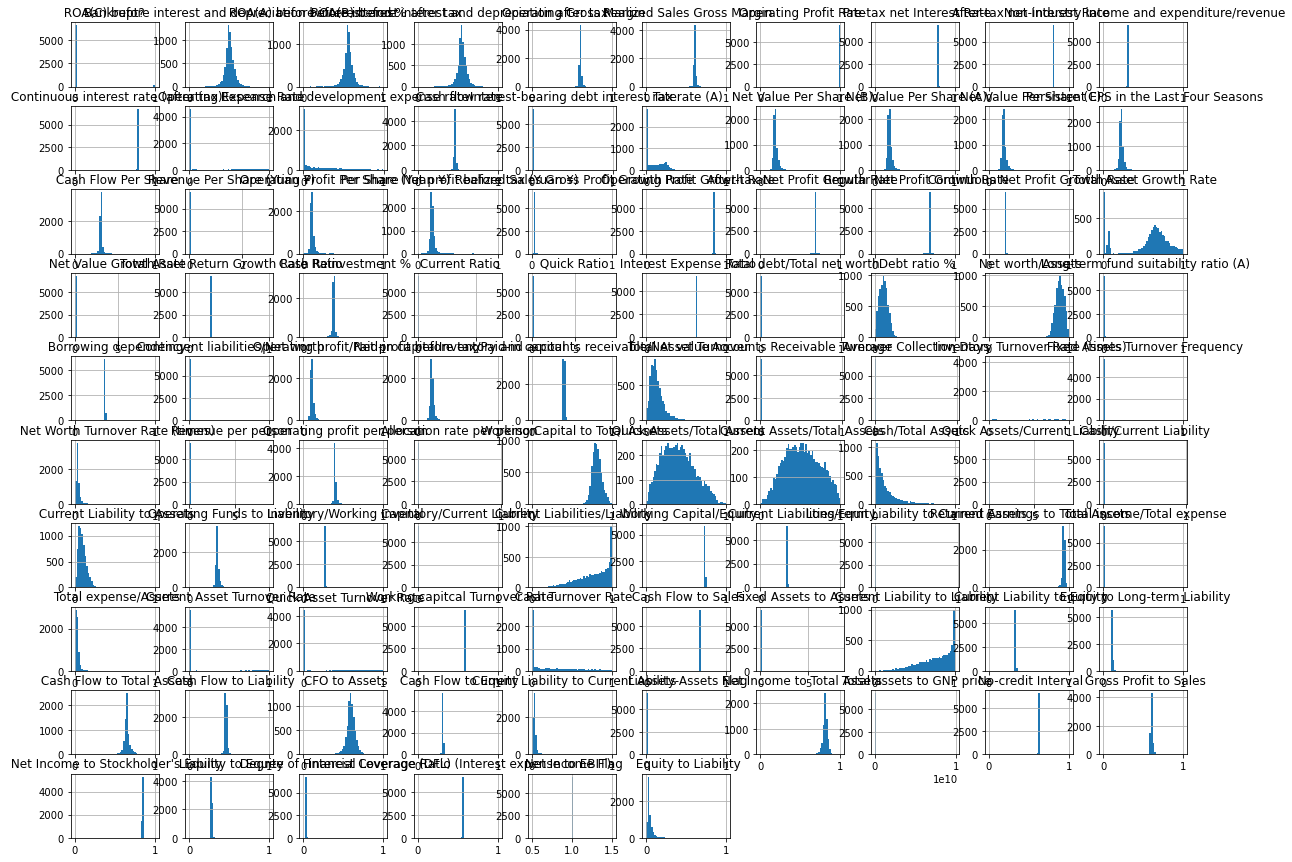

In [20]:
%matplotlib inline  
bank_data.hist(bins=50, figsize=(20,15)) 
plt.show()

## plotting.scatter_matrix()

Only do plotting.scatter_matrix() in the first 5 columns, because use all 96 columns will take  forever.

array([[<AxesSubplot:xlabel=' ROA(C) before interest and depreciation before interest', ylabel=' ROA(C) before interest and depreciation before interest'>,
        <AxesSubplot:xlabel=' ROA(A) before interest and % after tax', ylabel=' ROA(C) before interest and depreciation before interest'>,
        <AxesSubplot:xlabel=' ROA(B) before interest and depreciation after tax', ylabel=' ROA(C) before interest and depreciation before interest'>,
        <AxesSubplot:xlabel=' Operating Gross Margin', ylabel=' ROA(C) before interest and depreciation before interest'>,
        <AxesSubplot:xlabel=' Realized Sales Gross Margin', ylabel=' ROA(C) before interest and depreciation before interest'>],
       [<AxesSubplot:xlabel=' ROA(C) before interest and depreciation before interest', ylabel=' ROA(A) before interest and % after tax'>,
        <AxesSubplot:xlabel=' ROA(A) before interest and % after tax', ylabel=' ROA(A) before interest and % after tax'>,
        <AxesSubplot:xlabel=' ROA(B) befor

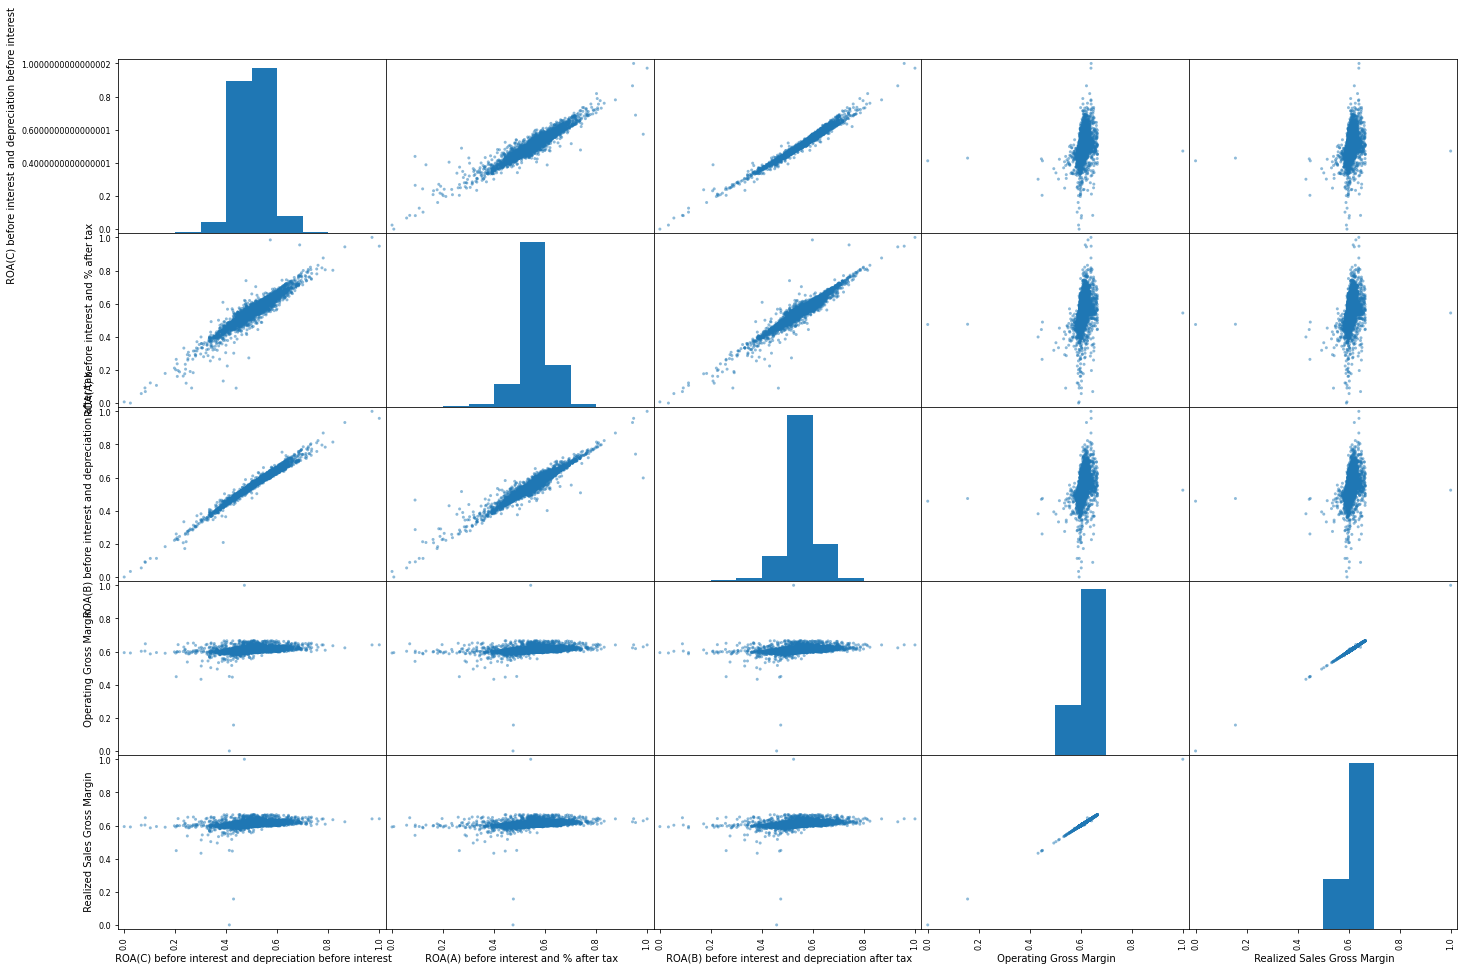

In [21]:
from pandas.plotting import scatter_matrix

attributes = [col for col in bank_data]
# scatter_matrix(bank_data[attributes], figsize=(12, 8))

attributes_new = attributes[1:6]
scatter_matrix(bank_data[attributes_new], figsize=(24, 16))

## Scatter Plot

<AxesSubplot:xlabel=' ROA(C) before interest and depreciation before interest', ylabel='Bankrupt?'>

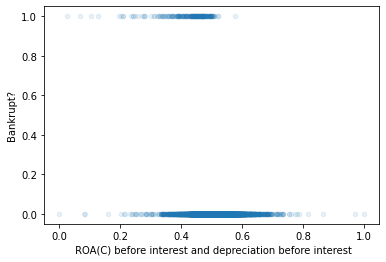

In [22]:
bank_data.plot(kind="scatter", x=" ROA(C) before interest and depreciation before interest", y="Bankrupt?", alpha=0.1)

<AxesSubplot:xlabel=' ROA(C) before interest and depreciation before interest', ylabel=' ROA(A) before interest and % after tax'>

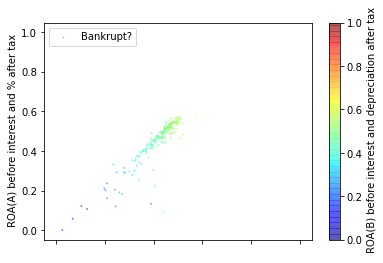

In [23]:
bank_data.plot(kind="scatter", x=' ROA(C) before interest and depreciation before interest', y=' ROA(A) before interest and % after tax', alpha=0.4,
                s=bank_data['Bankrupt?'], label='Bankrupt?',
                c=3, cmap=plt.get_cmap("jet"), colorbar=True,
               )

## Heatmap

Using the Heatmap shows which features are heavier.

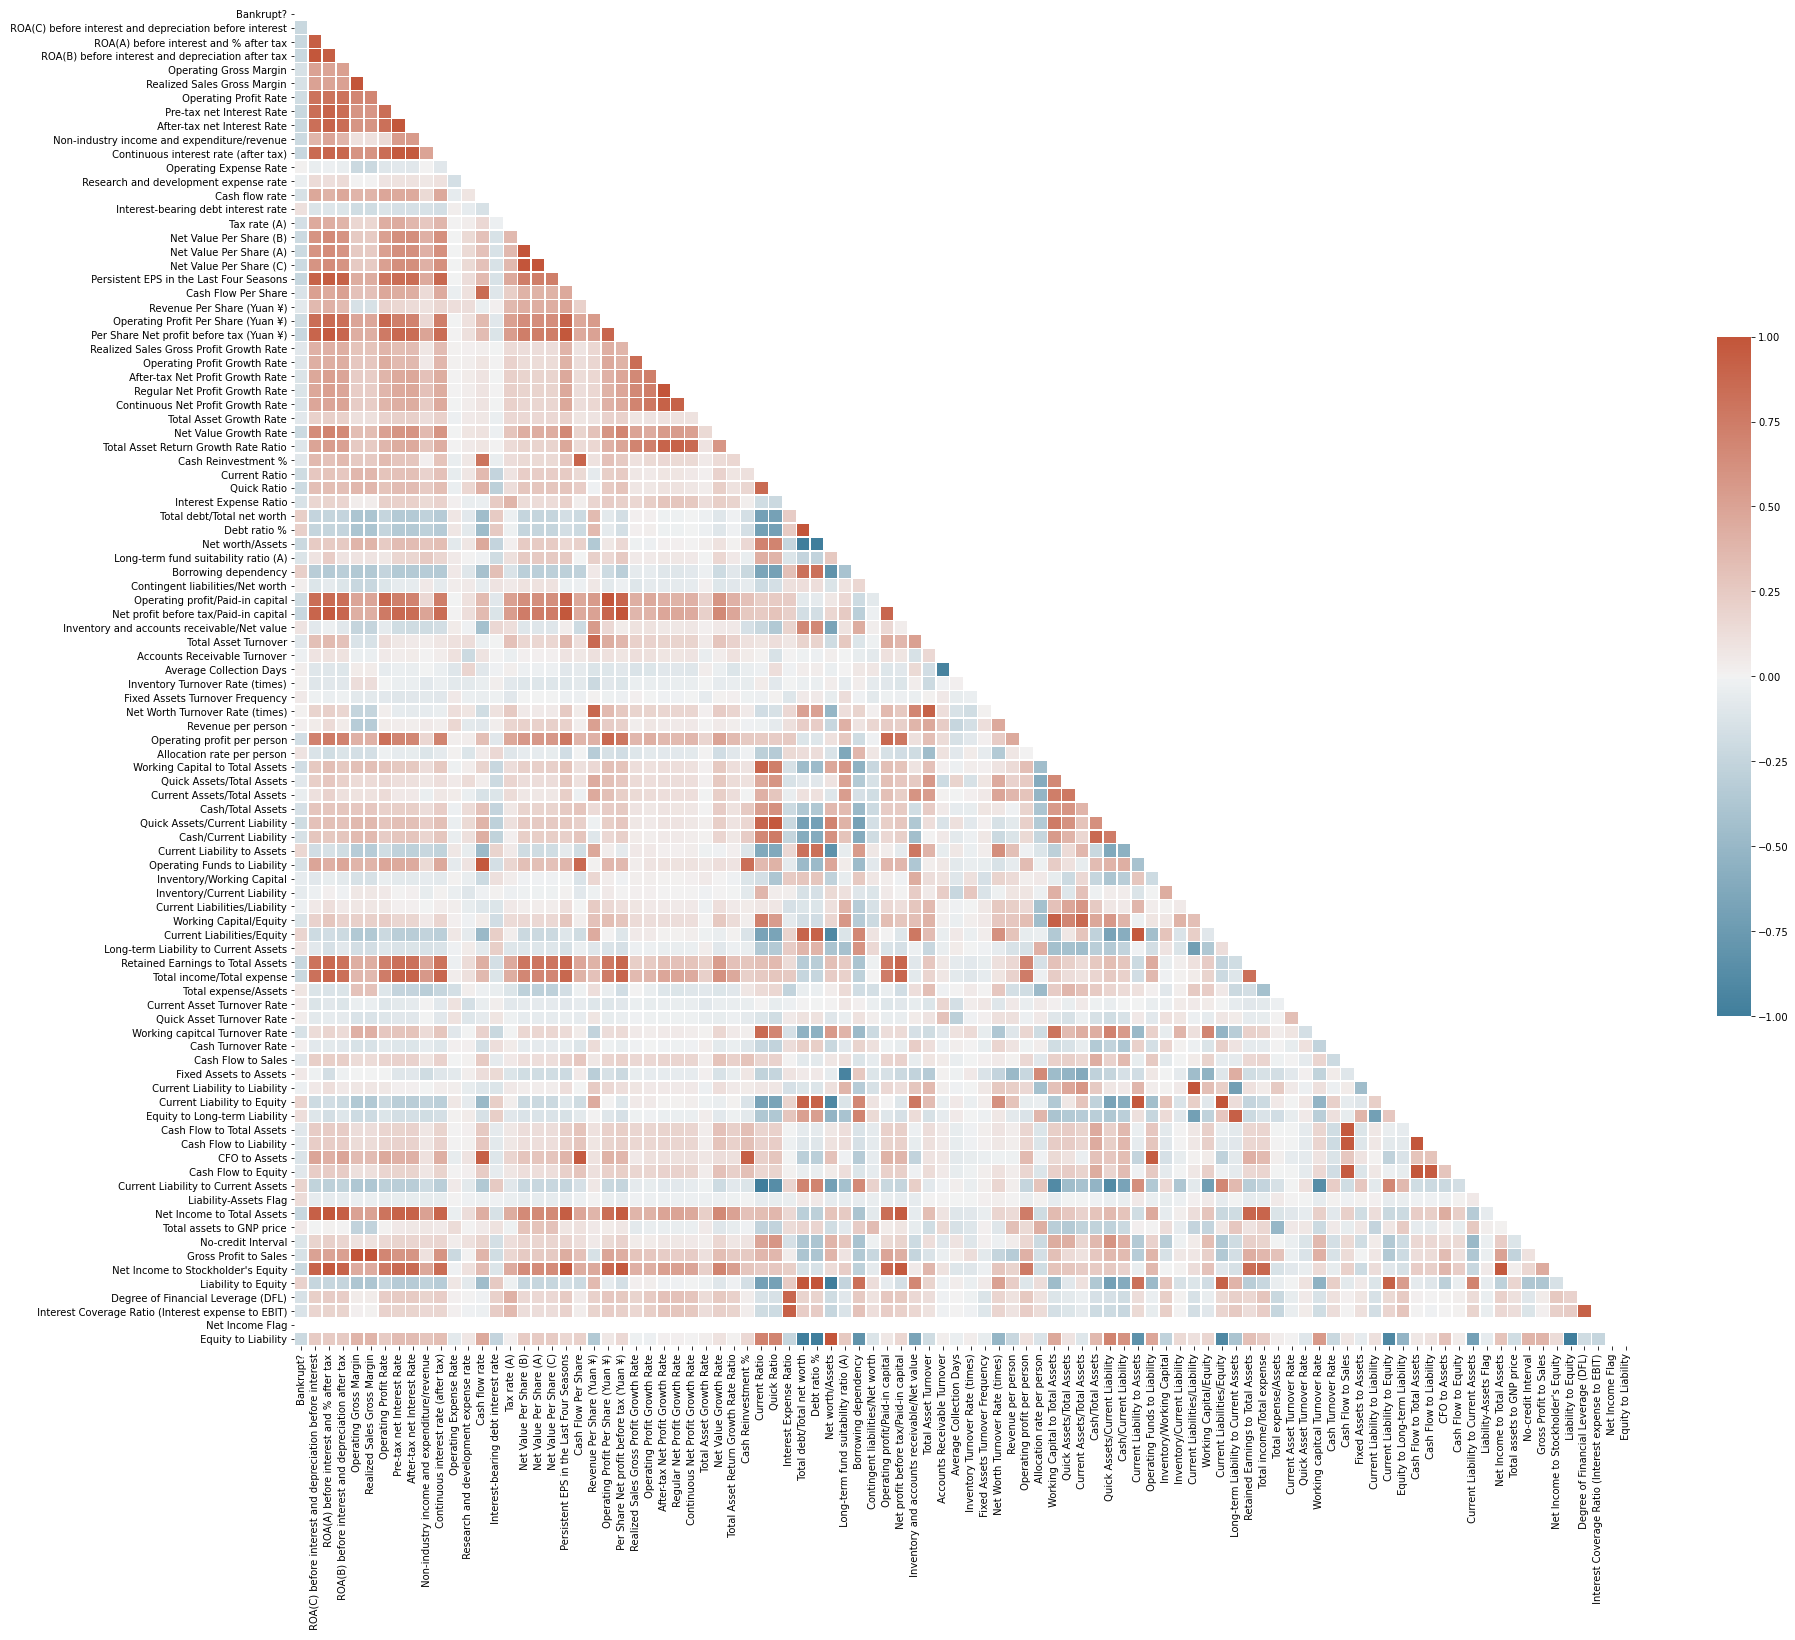

In [24]:
# EDA & VISUALIZATIONS

# Correlation Heatmap (Spearman)

f, ax = plt.subplots(figsize=(30, 25))
mat = bank_data.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Step 6: Apply transformations to your data.

In [25]:
bank_data_for_step_6 = pd.DataFrame()

## Squaring

In [26]:
bank_data_for_step_6[' ROA(C) sqrt'] = bank_data[' ROA(C) before interest and depreciation before interest'].apply(np.sqrt, axis=1)
bank_data_for_step_6[' ROA(A) sqrt'] = bank_data[' ROA(A) before interest and % after tax'].apply(np.sqrt, axis=1)



TypeError: 'axis' is an invalid keyword to ufunc 'sqrt'

##Cubing

In [ ]:
bank_data_for_step_6[' ROA(C) cbrt'] = bank_data[' ROA(C) before interest and depreciation before interest'].apply(np.cbrt, axis=1)
bank_data_for_step_6[' ROA(A) cbrt'] = bank_data[' ROA(A) before interest and % after tax'].apply(np.cbrt, axis=1)

##logarithmic

In [ ]:
bank_data_for_step_6[' ROA(C) log'] = bank_data[' ROA(C) before interest and depreciation before interest'].apply(np.log, axis=1)
bank_data_for_step_6[' ROA(A) log'] = bank_data[' ROA(A) before interest and % after tax'].apply(np.log, axis=1)


## Plot the histograms and scatter matrices

In [ ]:
bank_data_for_step_6_plot = bank_data_for_step_6.iloc[:, -6:-2]
bank_data_for_step_6_plot.head()

,ROA(C) sqrt,ROA(A) sqrt,ROA(C) cbrt,ROA(A) cbrt
0,0.608765,0.651452,0.718290,0.751487
1,0.681389,0.733631,0.774337,0.813427
2,0.652741,0.706413,0.752478,0.793181
3,0.632332,0.671762,0.736711,0.767027
4,0.681925,0.733779,0.774743,0.813536


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe619948890>,
      dtype=object)

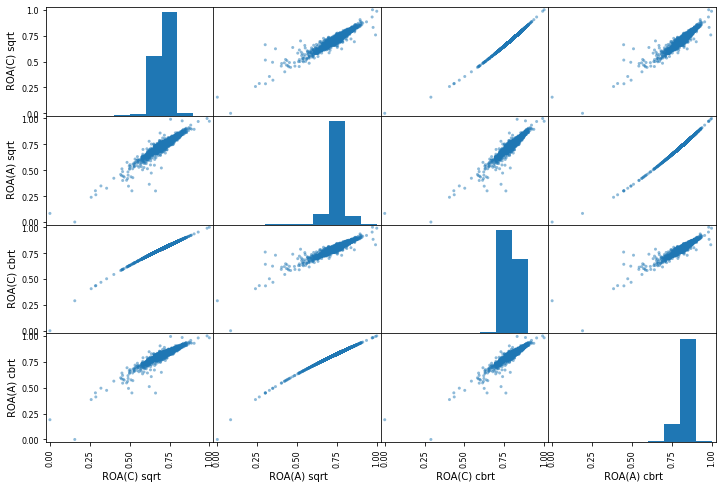

In [ ]:
from pandas.plotting import scatter_matrix

attributes = [col for col in bank_data_for_step_6_plot]
scatter_matrix(bank_data_for_step_6_plot[attributes], figsize=(12, 8))


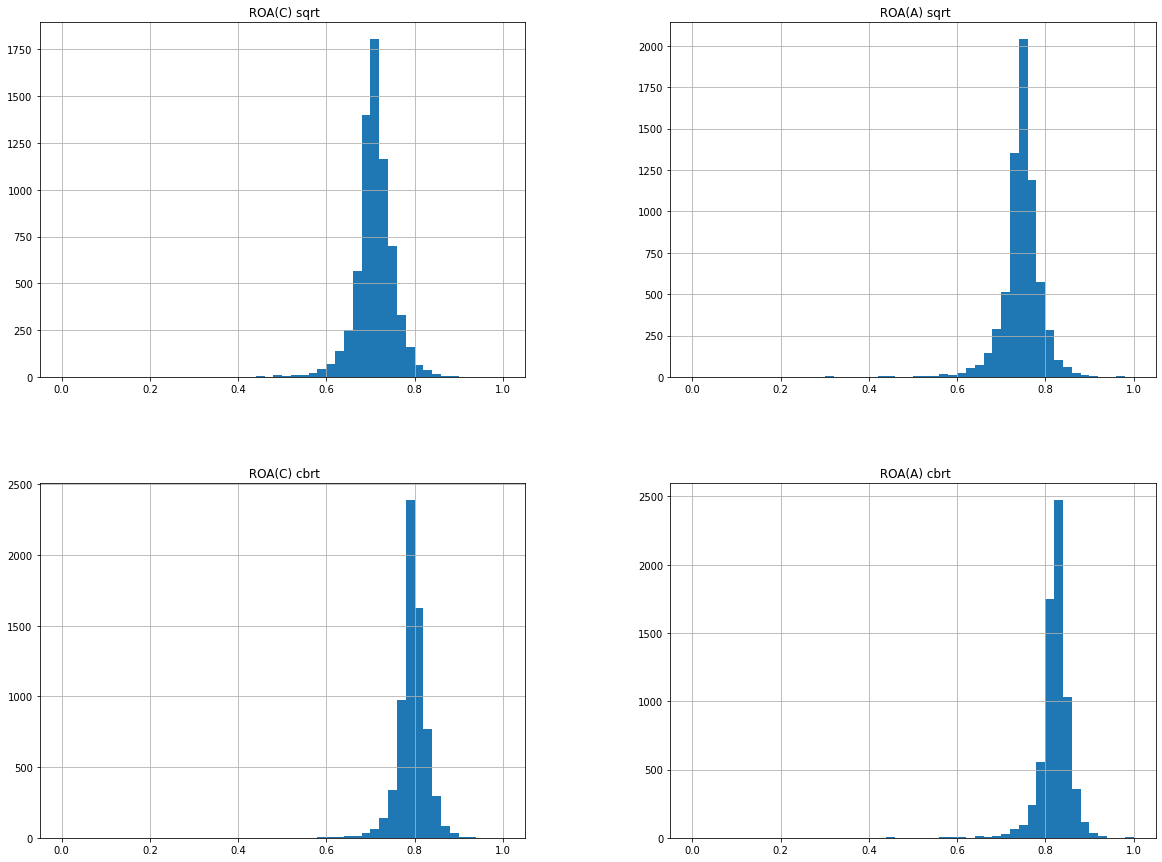

In [ ]:
%matplotlib inline 
bank_data_for_step_6_plot.hist(bins=50, figsize=(20,15)) 
plt.show()

## One Hot Encoding

However, the dataset has only 2 categorical values, so it's not necessary to do it.

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = LabelEncoder()
bank_data_cat = bank_data["Bankrupt?"]
bank_data_cat_encoded = encoder.fit_transform(bank_data_cat)
bank_data_cat_encoded

encoderOneHot = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(bank_data_cat_encoded.reshape(-1,1))
housing_cat_1hot


c:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

##Standardization

In [29]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
# reshape to len:1
data_norm.iloc[:] = sc.fit_transform(data_norm.iloc[:])

sc.transform(data_norm)
data_norm.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,0.0,-0.622067
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,0.0,-0.535573
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,...,-0.820510,-0.049491,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,0.0,-0.621960
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,...,-1.691222,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,0.0,-0.471826
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,0.013300,...,-0.316008,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,0.0,-0.241715
